# this is the EDA phase aiming to understand the data and Wrangle it

About Dataset
Context
Ever wondered if you should carry an umbrella tomorrow? With this dataset, you can predict next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.

RainTomorrow is the target variable to predict. It answers the crucial question: will it rain the next day? (Yes or No).

This column is marked 'Yes' if the rain for that day was 1mm or more.
Source & Acknowledgements
The observations were gathered from a multitude of weather stations. You can access daily observations from http://www.bom.gov.au/climate/data.
For example, you can check the latest weather observations in Canberra here: Canberra Weather.

Definitions have been adapted from the Bureau of Meteorology's Climate Data Online.
Data source: Climate Data and Climate Data Online.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

| Column Name | Description | Units / Type |
| :--- | :--- | :--- |
| **Date** | The date of observation | Date (YYYY-MM-DD) |
| **Location** | The common name of the weather station location | Categorical (City Name) |
| **MinTemp** | The minimum temperature recorded in the 24 hours to 9am | Celsius (°C) |
| **MaxTemp** | The maximum temperature recorded in the 24 hours to 9am | Celsius (°C) |
| **Rainfall** | The amount of rainfall recorded for the day | Millimeters (mm) |
| **Evaporation** | The Class A pan evaporation (water evaporation) in the 24 hours to 9am | Millimeters (mm) |
| **Sunshine** | The number of hours of bright sunshine in the day | Hours |
| **WindGustDir** | The direction of the strongest wind gust in the 24 hours to midnight | Categorical (16 Compass Points) |
| **WindGustSpeed** | The speed of the strongest wind gust in the 24 hours to midnight | Kilometers per hour (km/h) |
| **WindDir9am** | The direction of the wind at 9am | Categorical (Compass Points) |
| **WindDir3pm** | The direction of the wind at 3pm | Categorical (Compass Points) |
| **WindSpeed9am** | The wind speed averaged over 10 minutes prior to 9am | Kilometers per hour (km/h) |
| **WindSpeed3pm** | The wind speed averaged over 10 minutes prior to 3pm | Kilometers per hour (km/h) |
| **Humidity9am** | The relative humidity at 9am | Percent (%) |
| **Humidity3pm** | The relative humidity at 3pm | Percent (%) |
| **Pressure9am** | Atmospheric pressure reduced to mean sea level at 9am | Hectopascals (hPa) |
| **Pressure3pm** | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascals (hPa) |
| **Cloud9am** | Fraction of the sky obscured by cloud at 9am | Oktas (0–8 scale) |
| **Cloud3pm** | Fraction of the sky obscured by cloud at 3pm | Oktas (0–8 scale) |
| **Temp9am** | Temperature recorded at 9am | Celsius (°C) |
| **Temp3pm** | Temperature recorded at 3pm | Celsius (°C) |
| **RainToday** | Did the current day receive rainfall exceeding 1mm? | Binary (Yes/No) |
| **RainTomorrow** | **(Target)** Did it rain the next day? | Binary (Yes/No) |

Sources
https://www.kaggle.com/code/jribeiro09/

The Observation Cycle (9 AM & 3 PM)
The dataset relies on two primary checkpoints throughout the day to capture the transition of weather patterns.

Morning Observations (9 AM): These reflect the overnight conditions and the state of the atmosphere before significant solar heating occurs.

Afternoon Observations (3 PM): These capture the "peak" conditions of the day, such as maximum temperature and humidity after hours of solar exposure.

In [2]:
import pandas as pd 
import numpy as np
import plotly.express as px

In [3]:
dta= pd.read_csv(r"D:\Ahmed\K_repo\Weatheraus_repo\archive\weatherAUS.csv")

## EXPLORE

In [4]:
dta.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

with (RainToday      142199 non-null),(RainTomorrow   142193 non-null) about 3.2% null values so can drop it 

as these are the main parameters of the data. 

In [6]:
dta.dropna(subset=['RainToday'], inplace=True)
dta.dropna(subset=['RainTomorrow'], inplace=True)

In [7]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [8]:
dta.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [9]:
dta.describe(include="object")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,140787,140787,131624,131127,137117,140787,140787
unique,3436,49,16,16,16,2,2
top,2013-12-15,Canberra,W,N,SE,No,No
freq,49,3402,9696,11266,10578,109332,109586


In [10]:
# recheck for nulls 
dta.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

### need to invstigate the huge amount of nulls in these cols [Evaporation, Sunshine, Cloud9am, Cloud3pm] 

checking if its entery missing or have meanings

In [11]:
messings_dt= dta[["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm" , "RainToday","RainTomorrow"]]
messings_dt.head(20)

,Evaporation,Sunshine,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,NaN,NaN,8.0,NaN,No,No
1,NaN,NaN,NaN,NaN,No,No
2,NaN,NaN,NaN,2.0,No,No
3,NaN,NaN,NaN,NaN,No,No
4,NaN,NaN,7.0,8.0,No,No
5,NaN,NaN,NaN,NaN,No,No
6,NaN,NaN,1.0,NaN,No,No
7,NaN,NaN,NaN,NaN,No,No
8,NaN,NaN,NaN,NaN,No,Yes
9,NaN,NaN,NaN,NaN,Yes,No


### It looks like I can't find direct evidence that NaN values represent a specific meaning, except that it was not recorded that day. drop these cols

In [13]:
# check for duplicats 
dta.duplicated().sum()

0

### CHECK CORRELATION

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

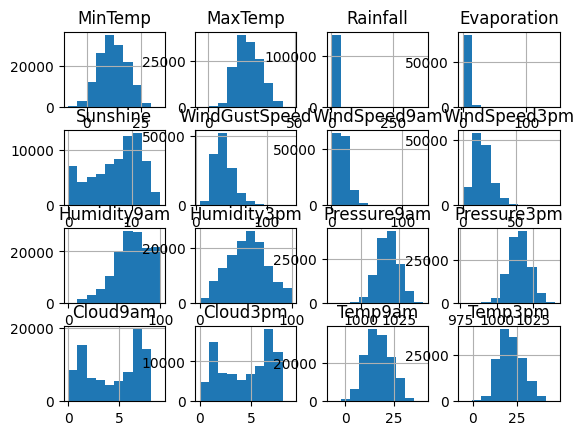

In [25]:
dta.hist()

so cant use pearson test cause of skewness in data and lack of N.D use sperman & kendal 

In [26]:
dta['RainToday'] = dta['RainToday'].replace({'No': 0, 'Yes': 1})

C:\Users\DUBAI STORE\AppData\Local\Temp\ipykernel_14880\4239447284.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dta['RainToday'] = dta['RainToday'].replace({'No': 0, 'Yes': 1})


In [27]:
dta['RainTomorrow'] = dta['RainTomorrow'].replace({'No': 0, 'Yes': 1})

C:\Users\DUBAI STORE\AppData\Local\Temp\ipykernel_14880\3799617006.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dta['RainTomorrow'] = dta['RainTomorrow'].replace({'No': 0, 'Yes': 1})


In [28]:
dta.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [45]:
numi_dta=dta.select_dtypes(include="number")


In [46]:
#col_toDrop= ["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm" ]
#for i in col_toDrop:
    #numi_dta.drop(i,axis=1,inplace=True)

numi_dta.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [47]:
corr_matrix=numi_dta.corr(method="spearman")
fig = px.imshow(
    corr_matrix,
    text_auto=True,               
    aspect="auto",                
    color_continuous_scale='RdBu_r', 
    labels=dict(color="Correlation"), 
    title="Interactive Correlation Matrix"
)
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Correlation: %{z}<extra></extra>',
              'name': '0',
              'texttemplate': '%{z}',
              'type': 'heatmap',
              'x': array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                          'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                          'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                          'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'], dtype=object),
              'xaxis': 'x',
              'y': array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                          'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                          'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                          'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'], dtype=object),
              'yaxis': 'y',
              'z': {'bdata': ('AAAAAAAA8D9l2k1Po5znP8TwTm9tr5' ... 'vvO0XByL+pe5zuxgnUPwAAAAAAAPA/'),
                    'dtype': 'f8',
                    'shape': '18, 18'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Correlation'}},
                             'colorscale': [[0.0, 'rgb(5,48,97)'], [0.1,
                                            'rgb(33,102,172)'], [0.2,
                                            'rgb(67,147,195)'], [0.3,
                                            'rgb(146,197,222)'], [0.4,
                                            'rgb(209,229,240)'], [0.5,
                                            'rgb(247,247,247)'], [0.6,
                                            'rgb(253,219,199)'], [0.7,
                                            'rgb(244,165,130)'], [0.8,
                                            'rgb(214,96,77)'], [0.9,
                                            'rgb(178,24,43)'], [1.0,
                                            'rgb(103,0,31)']]},
               'template': '...',
               'title': {'text': 'Interactive Correlation Matrix'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'domain': [0.0, 1.0]}}
})